<a href="https://colab.research.google.com/github/MennoLPomp/MennoLPomp/blob/main/GEM_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
from google.colab import files
from scipy.io import loadmat
import matplotlib.pyplot as plt

import networkx as nx

In [ ]:
files.upload(); # uppload K9.mat here

Saving K9.mat to K9.mat


In [ ]:

A = loadmat('K9.mat')['K7'].T - 1 # start patient count from 0
#list(enumerate(A[0]))
#len(A)
#A[0] 
#len(A)
#list(enumerate(A[0])) #first choices

In [ ]:
# if cycle_length <= 3 available:
    # take small cycle


# if all cycle_lengt_3 > 3:
    # start cycle with player with highest priority
    # select omega chain with ending player on highest priority of ending in cycle
    # if multiple chains according to (e)

In [ ]:
def TTCC(A):
    N = len(A)

    # Nodes 0 - (N - 2) represent patient 1 ... (N - 1),
    # node N - 1 represents w.
    w = N - 1
    G = nx.DiGraph(directed=True)
    G.add_nodes_from(range(N))

    # patient 1 points to 56, patient 2 points to 6 etc.
    G.add_edges_from(list(enumerate(A[0])))

    matching = dict() # final matching to be returned
    # passive matching, necessary for reconstruction graph
    passive_matching = dict()
    # kidneys yet unassigned, note that this set need not be equal
    # to the set of remaining players. The first player in a w-chain
    # is not a remaining player anymore but his/her kidney need not be
    # assigned yet. (always includes w)
    unassigned = set(range(N))
    players = set(range(N-1))



    while True:

        # --- CYCLE LOOP ---
        while True:
            # There exists a function to search for a single cycle
            # in networkx, however it raises an exception when no cycle foundd
            # and I do not whish for a try/catch block in 'production' code.
            cycles = list(nx.simple_cycles(G))
            # no more cycles found => go to w-chain step
            if len(cycles) == 0:
                break

            cycle = cycles[0]
            M = len(cycle)
            for j in range(M):
                matching[cycle[j]] = cycle[(j+1) % M]
                if cycle[j] in unassigned:
                    unassigned.remove(cycle[j])

            # reconstruct graph
            remaining_players = players.difference(matching.keys())
            G = nx.create_empty_copy(G)
            # add passive player's assignments
            G.add_edges_from(passive_matching.items())
            for player in remaining_players:
                for preference in A[:, player]:
                    if preference in unassigned:
                        G.add_edge(player, preference)
                        break

            if len(matching) == N - 1:
                break

        # check if cycle loop breaks because of no more cycles or matching finished
        if len(matching) == N - 1:
            break
        # --- w-chain part ---
        # add virtual edges from w to all players such that w-chains become cycle
        G.add_edges_from([(w, x) for x in G.nodes])

        chains = []
        for chain in nx.simple_cycles(G):
            # check if chain is novel, i.e. we aren't stuck in an infinite loop
            if len(set(chain).difference(matching.keys()).difference({w})) > 0:
                chains.append(chain)

        # only select chains of max length (e)
        M = len(max(chains, key=len))
        max_chains = []
        for chain in chains:
            if len(chain) == M:
                max_chains.append(chain)

        # priority over remaining players
        priority = sorted(list(players.difference(matching.keys())))

        for p in priority:
            for max_chain in max_chains:
                if p in max_chain:
                    for j in range(M):
                        if max_chain[j] == w:
                            continue
                        matching[max_chain[j]] = max_chain[(j+1) % M]
                        passive_matching[max_chain[j]] = max_chain[(j+1) % M]
                        # why is this here?
                        if max_chain[(j+1) % M] in unassigned and max_chain[(j+1) % M]  != w:
                            unassigned.remove(max_chain[(j+1) % M])
                        # matching rule (e) specifies to make players passive, i.e.
                        # do not remove
                    break
            else: # code to break out of a nested loop
                continue
            break

        # reconstruct graph, TODO: make into function to avoid repetition
        remaining_players = players.difference(matching.keys())
        G = nx.create_empty_copy(G) # also removes virtual edges
        # add passive player's assignments
        G.add_edges_from(passive_matching.items())
        for player in remaining_players:
            for preference in A[:, player]:
                if preference in unassigned:
                    G.add_edge(player, preference)
                    break

        if len(matching) == N - 1:
            break

    return matching

In [ ]:
matching = TTCC(A)

[58]
[64, 105]
[97, 6, 100, 16, 114, 52, 111, 84, 47, 12, 51, 26]
[96, 89, 14, 71, 83, 53, 67, 94, 36, 61, 110, 77, 107, 2]
[102, 8, 13, 44, 31, 93]
[32, 63, 55, 33, 117, 106, 19, 49]
[85, 38]
[3, 9, 76, 57, 62, 39, 15, 86, 115]
[81, 7, 29, 37]
[99, 28, 17, 23, 20, 27, 69, 74, 112, 45, 50, 104, 21, 78, 24]
[72, 30]
[34, 103, 108]


In [ ]:
A[:, 0].shape

(120,)

In [ ]:
import pandas as pd
df = pd.DataFrame(np.array(sorted(matching.items())) + 1, columns=['patient', 'kidney']).set_index('patient')
df

,kidney
patient,
1,6
2,23
3,97
4,10
5,96
...,...
115,53
116,4
117,92


In [ ]:
lol = None
def TTCC(A):
    global lol
    N = len(A)

    # Nodes 0 - (N - 2) represent patient 1 ... (N - 1),
    # node N - 1 represents w.
    w = N - 1
    G = nx.DiGraph(directed=True)
    G.add_nodes_from(range(N))

    # patient 1 points to 56, patient 2 points to 6 etc.
    G.add_edges_from(list(enumerate(A[0])))

    matching = dict() # final matching to be returned
    # passive matching, necessary for reconstruction graph
    passive_matching = dict()
    # kidneys yet unassigned, note that this set need not be equal
    # to the set of remaining players. The first player in a w-chain
    # is not a remaining player anymore but his/her kidney need not be
    # assigned yet. (always includes w)
    unassigned = set(range(N))
    players = set(range(N-1))



    while True:

        # --- CYCLE LOOP ---
        while True:

            # There exists a function to search for a single cycle
            # in networkx, however it raises an exception when no cycle foundd
            # and I do not whish for a try/catch block in 'production' code.
            cycles = list(nx.simple_cycles(G))
            # no more cycles found => go to w-chain step
            if len(cycles) == 0:
                break

            cycle = min(cycles, key=len)

            if len(cycle) > 3:
                # now we are in business of question (b)
                #prefix_chain = beginning of omega chain

                prefix_chains = []
                for cycle in cycles:
                    # seek player with highest priority (lowest number)
                    # in the chosen cycle, start there
                    cycle = np.array(cycle)
                    # location of highest cycle player
                    priority_loc = np.argmin(cycle)
                    # make priority player starting point
                    prefix_chain = list(np.roll(cycle, -priority_loc)) 
                    # 'cut' the cycle at the right point
                    G.remove_edge(prefix_chain[-1], prefix_chain[0])

                    M = len(prefix_chain)
                    for j in range(M - 1):
                        matching[prefix_chain[j]] = prefix_chain[j + 1]
                        passive_matching[prefix_chain[j]] = prefix_chain[j + 1]
                        # prefix_chain[0]'s kidney is not yet assigned
                        if prefix_chain[j + 1] in unassigned.difference({w}):
                            unassigned.remove(prefix_chain[j + 1])                        

                    prefix_chains.append(prefix_chain)
                        

                # now there should not be any more cycles => DAG

                for prefix_chain in prefix_chains:
                    
                    # reconstruct graph carefully
                    remaining_players = players.difference(matching.keys())
                    if True:
                        for player in remaining_players:
                            if G.out_degree(player) == 1:
                                successor = list(G.successors(player))[0]
                                if successor not in unassigned:
                                    G.remove_edge(player, successor)
                                    #for preference in A[:, player]:
                                        #if preference in unassigned:
                                           # code om te zoeken of dit tot een cycle leidt
                                           # G.add_edge(player, preference)
                                           # break



                    # find all omega chains at this moment
                    # add virtual edges from w to all players such that w-chains become cycle
                    G.add_edges_from([(w, x) for x in G.nodes])
                    chains = []
                    for chain in nx.simple_cycles(G):

                        # check if chain is novel, i.e. we aren't stuck in an infinite loop
                        if len(set(chain).difference(matching.keys()).difference({w})) > 0:
                            # locate w
                            chain = np.array(chain) 
                            w_loc = int(np.where(chain == w)[0].squeeze())
                            # make w ending point, solution: first make w_loc
                            # starting point and then roll back once 'more'
                            chain = np.roll(chain, -w_loc - 1)
                            chains.append(chain)

                    # player at the end of cut cycle
                    loose_player = prefix_chain[-1]
                    # loop over preference, connect highest preference available
                    for preference in A[:, loose_player]:
                        for chain in chains:
                            # always terminates as there is the trivial w chain [w]
                            if preference == chain[0]:
                                # IMPLEMENT RULE (E)
                                # we are in business to connect the chains!
                                # connecting
                                G.add_edge(loose_player, chain[0])
                                suffix_chain = [loose_player, *chain]

                                M = len(suffix_chain)
                                for j in range(M-1):
                                    matching[suffix_chain[j]] = suffix_chain[j + 1]
                                    passive_matching[suffix_chain[j]] = suffix_chain[j + 1]
                                    # suffix_chain[0]'s kidney is already assigned
                                    if suffix_chain[j + 1] in unassigned.difference({w}):
                                        unassigned.remove(suffix_chain[j + 1])
                                break
                        else:
                            continue
                        break
                    # remove virtual edges
                    G.remove_edges_from([(w, x) for x in G.nodes])


            else:
                M = len(cycle)
                for j in range(M):
                    matching[cycle[j]] = cycle[(j+1) % M]
                    if cycle[j] in unassigned:
                        unassigned.remove(cycle[j])

            # reconstruct graph
            remaining_players = players.difference(matching.keys())
            G = nx.create_empty_copy(G)
            # add passive player's assignments
            G.add_edges_from(passive_matching.items())
            for player in remaining_players:
                for preference in A[:, player]:
                    if preference in unassigned:
                        G.add_edge(player, preference)
                        break

            if len(matching) == N - 1:
                break

        # check if cycle loop breaks because of no more cycles or matching finished
        if len(matching) == N - 1:
            break
        # --- w-chain part ---
        # add virtual edges from w to all players such that w-chains become cycle
        G.add_edges_from([(w, x) for x in G.nodes])

        chains = []
        for chain in nx.simple_cycles(G):
            # check if chain is novel, i.e. we aren't stuck in an infinite loop
            if len(set(chain).difference(matching.keys()).difference({w})) > 0:
                chains.append(chain)

        # only select chains of max length (e)
        M = len(max(chains, key=len))
        max_chains = []
        for chain in chains:
            if len(chain) == M:
                max_chains.append(chain)

        # priority over remaining players
        priority = sorted(list(players.difference(matching.keys())))

        for p in priority:
            for max_chain in max_chains:
                if p in max_chain:
                    for j in range(M):
                        if max_chain[j] == w:
                            continue
                        matching[max_chain[j]] = max_chain[(j+1) % M]
                        passive_matching[max_chain[j]] = max_chain[(j+1) % M]

                        if max_chain[(j+1) % M] in unassigned and max_chain[(j+1) % M]  != w:
                            unassigned.remove(max_chain[(j+1) % M])
                        # matching rule (e) specifies to make players passive, i.e.
                        # do not remove
                    break
            else: # code to break out of a nested loop
                continue
            break

        # reconstruct graph, TODO: make into function to avoid repetition
        remaining_players = players.difference(matching.keys())
        G = nx.create_empty_copy(G) # also removes virtual edges
        # add passive player's assignments
        G.add_edges_from(passive_matching.items())
        for player in remaining_players:
            for preference in A[:, player]:
                if preference in unassigned:
                    G.add_edge(player, preference)
                    break

        if len(matching) == N - 1:
            break

    return matching

In [ ]:
matching = TTCC(A)
np.unique(list(matching.values()), return_counts=True)

(array([  0,   1,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  42,  43,
         44,  45,  46,  47,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 

In [ ]:
len(matching)

119

In [ ]:
np.hstack([[17, 50, 18, 90, 21, 78, 24, 99, 28], [5, 43, 73, 56]])

array([17, 50, 18, 90, 21, 78, 24, 99, 28,  5, 43, 73, 56])

In [ ]:
len(np.unique(list(matching.keys())))

119

In [ ]:
np.unique(list(matching.values()), return_counts=True)

(array([  0,   1,   3,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  28,
         29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  42,  43,
         44,  45,  46,  47,  49,  50,  51,  52,  53,  54,  55,  56,  57,
         58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  76,  77,  78,  79,  80,  81,  82,  83,  84,
         85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
         98,  99, 100, 101, 102, 104, 105, 106, 107, 109, 110, 111, 112,
        113, 114, 115, 116, 117, 118, 119]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
 

In [ ]:
matching

{0: 5,
 1: 88,
 2: 96,
 3: 9,
 4: 95,
 5: 43,
 6: 100,
 7: 22,
 8: 13,
 9: 76,
 10: 68,
 11: 25,
 12: 51,
 13: 44,
 14: 71,
 15: 86,
 16: 114,
 17: 50,
 18: 90,
 19: 49,
 20: 7,
 21: 78,
 22: 70,
 23: 20,
 24: 99,
 25: 46,
 26: 97,
 27: 69,
 28: 92,
 29: 0,
 30: 72,
 31: 93,
 32: 63,
 33: 117,
 34: 104,
 35: 87,
 36: 61,
 37: 34,
 38: 85,
 39: 15,
 40: 79,
 41: 119,
 42: 10,
 43: 73,
 44: 31,
 45: 45,
 46: 1,
 47: 12,
 48: 119,
 49: 32,
 50: 18,
 51: 26,
 52: 111,
 53: 67,
 54: 98,
 55: 33,
 56: 40,
 57: 62,
 58: 58,
 59: 59,
 60: 11,
 61: 110,
 62: 39,
 63: 55,
 64: 105,
 65: 91,
 66: 19,
 67: 94,
 68: 35,
 69: 65,
 70: 119,
 71: 83,
 72: 30,
 73: 56,
 74: 101,
 75: 42,
 76: 57,
 77: 107,
 78: 24,
 79: 24,
 80: 119,
 81: 3,
 82: 60,
 83: 53,
 84: 47,
 85: 38,
 86: 115,
 87: 109,
 88: 112,
 89: 14,
 90: 21,
 91: 17,
 92: 8,
 93: 102,
 94: 36,
 95: 119,
 96: 89,
 97: 23,
 98: 119,
 99: 28,
 100: 16,
 101: 74,
 102: 80,
 103: 118,
 104: 37,
 105: 64,
 106: 113,
 107: 116,
 108: 29,
 109:

In [ ]:
[x for x, y in matching.items() if y == 15]

[39]

In [ ]:
sum(np.array(list(matching.values())) == 119)

7

In [ ]:
import pandas as pd
df = pd.DataFrame(np.array(sorted(matching.items())) + 1, columns=['patient', 'kidney']).set_index('patient')
df

,kidney
patient,
1,6
2,23
3,97
4,10
5,96
...,...
115,53
116,4
117,92


## b) Max 3 operations


In [ ]:
def TTCC_mod(A):
    N = len(A)

    # Nodes 0 - (N - 2) represent patient 1 ... (N - 1),
    # node N - 1 represents w.
    w = N - 1
    G = nx.DiGraph(directed=True)
    G.add_nodes_from(range(N))

    # patient 1 points to 56, patient 2 points to 6 etc.
    G.add_edges_from(list(enumerate(A[0])))

    matching = dict() # final matching to be returned
    # passive matching, necessary for reconstruction graph
    passive_matching = dict()
    # kidneys yet unassigned, note that this set need not be equal
    # to the set of remaining players. The first player in a w-chain
    # is not a remaining player anymore but his/her kidney need not be
    # assigned yet. (always includes w)
    unassigned = set(range(N))
    players = set(range(N-1))

    while True:

        # --- CYCLE LOOP ---
        while True:
            # There exists a function to search for a single cycle
            # in networkx, however it raises an exception when no cycle foundd
            # and I do not whish for a try/catch block in 'production' code.
            cycles = list(nx.simple_cycles(G))
            # no more cycles found => go to w-chain step
            if len(cycles) == 0:
                break
            if all([len(cycle)>3 for cycle in cycles]):
              #I reconstruct the graph, assigning w to lowest ranked player in every cycle
                G = nx.create_empty_copy(G)
                for cycle in cycles:
                  for player in cycle:
                    if player==max(cycle): #lowest priority player
                      G.add_edge(player, 119)
                    else:
                      for preference in A[:, player]:
                        if preference in unassigned:
                            G.add_edge(player, preference)
                            break

                    
                continue
           




                
                
        
        
                            
                          

            cycle = list(filter(lambda x: len(x)<=3, cycles))[0]  #choose the first cycle <=3
            M = len(cycle)
            for j in range(M):
                matching[cycle[j]] = cycle[(j+1) % M]
                if cycle[j] in unassigned:
                    unassigned.remove(cycle[j])

            # reconstruct graph
            remaining_players = players.difference(matching.keys())
            G = nx.create_empty_copy(G)
            # add passive player's assignments
            G.add_edges_from(passive_matching.items())
            for player in remaining_players:
                for preference in A[:, player]:
                    if preference in unassigned:
                        G.add_edge(player, preference)
                        break

            if len(matching) == N - 1:
                break

        # check if cycle loop breaks because of no more cycles or matching finished
        if len(matching) == N - 1:
            break
        # --- w-chain part ---
        # add virtual edges from w to all players such that w-chains become cycle
        
        G.add_edges_from([(w, x) for x in G.nodes])

        chains = []
        for chain in nx.simple_cycles(G):
            # check if chain is novel, i.e. we aren't stuck in an infinite loop
            if len(set(chain).difference(matching.keys()).difference({w})) > 0:
                chains.append(chain)
        
          
                                                       

        # only select chains of max length (e)
        M = len(max(chains, key=len))
        max_chains = []
        for chain in chains:
            if len(chain) == M:
                max_chains.append(chain)

        # priority over remaining players
        priority = sorted(list(players.difference(matching.keys())))

        for p in priority:
            for max_chain in max_chains:
                if p in max_chain:
                    for j in range(M):
                        if max_chain[j] == w:
                            continue
                        matching[max_chain[j]] = max_chain[(j+1) % M]
                        passive_matching[max_chain[j]] = max_chain[(j+1) % M]

                        if max_chain[(j+1) % M] in unassigned and max_chain[(j+1) % M]  != w:
                            unassigned.remove(max_chain[(j+1) % M])
                        # matching rule (e) specifies to make players passive, i.e.
                        # do not remove
                    break
            else: # code to break out of a nested loop
                continue
            break

        # reconstruct graph, TODO: make into function to avoid repetition
        remaining_players = players.difference(matching.keys())
        G = nx.create_empty_copy(G) # also removes virtual edges
        # add passive player's assignments
        G.add_edges_from(passive_matching.items())
        for player in remaining_players:
            for preference in A[:, player]:
                if preference in unassigned:
                    G.add_edge(player, preference)
                    break

        if len(matching) == N - 1:
            break

    return matching

In [ ]:
matching=TTCC_mod(A)
matching

{0: 5,
 1: 22,
 2: 96,
 3: 33,
 4: 54,
 5: 108,
 6: 100,
 7: 29,
 8: 36,
 9: 76,
 10: 68,
 11: 30,
 12: 51,
 13: 103,
 14: 71,
 15: 86,
 16: 114,
 17: 82,
 18: 18,
 19: 49,
 20: 7,
 21: 78,
 22: 70,
 23: 20,
 24: 99,
 25: 46,
 26: 97,
 27: 69,
 28: 17,
 29: 0,
 30: 19,
 31: 93,
 32: 88,
 33: 44,
 34: 95,
 35: 87,
 36: 61,
 37: 81,
 38: 85,
 39: 15,
 40: 117,
 41: 119,
 42: 10,
 43: 73,
 44: 31,
 45: 77,
 46: 1,
 47: 12,
 48: 79,
 49: 32,
 50: 104,
 51: 26,
 52: 111,
 53: 67,
 54: 98,
 55: 91,
 56: 35,
 57: 118,
 58: 58,
 59: 116,
 60: 63,
 61: 52,
 62: 39,
 63: 55,
 64: 105,
 65: 4,
 66: 34,
 67: 94,
 68: 23,
 69: 74,
 70: 119,
 71: 83,
 72: 13,
 73: 80,
 74: 101,
 75: 42,
 76: 57,
 77: 107,
 78: 24,
 79: 56,
 80: 119,
 81: 62,
 82: 60,
 83: 53,
 84: 47,
 85: 38,
 86: 115,
 87: 109,
 88: 112,
 89: 14,
 90: 90,
 91: 43,
 92: 72,
 93: 102,
 94: 25,
 95: 119,
 96: 89,
 97: 6,
 98: 119,
 99: 28,
 100: 16,
 101: 11,
 102: 8,
 103: 50,
 104: 37,
 105: 64,
 106: 65,
 107: 2,
 108: 119,
 109: 

In [ ]:
for i in range(119):
  if list(matching.values()).count(i)>1:
    print("{} is a duplicate!".format(i))
    print()
  continue


In [ ]:
for x in range(10):
  print(x)


0
1
2
3
4
5
6
7
8
9


In [ ]:
list(enumerate(A[0]))

[(0, 55),
 (1, 33),
 (2, 96),
 (3, 33),
 (4, 54),
 (5, 53),
 (6, 100),
 (7, 22),
 (8, 36),
 (9, 83),
 (10, 38),
 (11, 25),
 (12, 51),
 (13, 44),
 (14, 71),
 (15, 86),
 (16, 114),
 (17, 82),
 (18, 53),
 (19, 49),
 (20, 7),
 (21, 78),
 (22, 70),
 (23, 20),
 (24, 99),
 (25, 46),
 (26, 97),
 (27, 69),
 (28, 97),
 (29, 38),
 (30, 72),
 (31, 93),
 (32, 63),
 (33, 44),
 (34, 104),
 (35, 87),
 (36, 61),
 (37, 81),
 (38, 85),
 (39, 15),
 (40, 89),
 (41, 17),
 (42, 77),
 (43, 73),
 (44, 31),
 (45, 77),
 (46, 47),
 (47, 12),
 (48, 79),
 (49, 32),
 (50, 104),
 (51, 26),
 (52, 111),
 (53, 67),
 (54, 104),
 (55, 31),
 (56, 36),
 (57, 47),
 (58, 58),
 (59, 26),
 (60, 63),
 (61, 52),
 (62, 39),
 (63, 55),
 (64, 105),
 (65, 114),
 (66, 16),
 (67, 94),
 (68, 23),
 (69, 74),
 (70, 119),
 (71, 83),
 (72, 13),
 (73, 25),
 (74, 22),
 (75, 42),
 (76, 38),
 (77, 107),
 (78, 24),
 (79, 24),
 (80, 107),
 (81, 62),
 (82, 39),
 (83, 53),
 (84, 47),
 (85, 63),
 (86, 111),
 (87, 109),
 (88, 39),
 (89, 14),
 (90, 38

In [ ]:
l=[[1,2], [1,2,3,4]]
list(filter(lambda x: len(x)<3, l))[0]



[1, 2]

In [ ]:
len(l[0])<3

True

In [ ]:
l[1]

[1, 2, 3, 4]

In [ ]:
all([len(cycle)<4 for cycle in l])

False

In [ ]:
a=[[1],[2,3], [6,7,8]]
b=[[1],[2,3]]
#list(set(a) - set(b))
set(a)

TypeError: ignored

In [ ]:
[x for x in a if x not in b]

[[6, 7, 8]]

In [ ]:
np.where(A[:,1]==100)

(array([84]),)

In [ ]:
list(A[:,1]).index(100+1)

11

In [ ]:
A[1,2]

17

In [ ]:
G.nodes()

NameError: ignored

In [ ]:
#modifying again; dont assign w immediately; just assign the next best kidney to lowest priority agent in cycles when only too long cycles




def TTCC_mod2(A):
    N = len(A)

    # Nodes 0 - (N - 2) represent patient 1 ... (N - 1),
    # node N - 1 represents w.
    w = N - 1
    G = nx.DiGraph(directed=True)
    G.add_nodes_from(range(N))

    # patient 1 points to 56, patient 2 points to 6 etc.
    G.add_edges_from(list(enumerate(A[0])))

    matching = dict() # final matching to be returned
    # passive matching, necessary for reconstruction graph
    passive_matching = dict()
    # kidneys yet unassigned, note that this set need not be equal
    # to the set of remaining players. The first player in a w-chain
    # is not a remaining player anymore but his/her kidney need not be
    # assigned yet. (always includes w)
    unassigned = set(range(N))
    players = set(range(N-1))

    while True:

        # --- CYCLE LOOP ---
        while True:
            # There exists a function to search for a single cycle
            # in networkx, however it raises an exception when no cycle foundd
            # and I do not whish for a try/catch block in 'production' code.
            cycles = list(nx.simple_cycles(G))
            # no more cycles found => go to w-chain step
            if len(cycles) == 0:
                break
            elif all([len(cycle)>3 for cycle in cycles]):
              #I reconstruct the graph, assigning next best to lowest ranked player in every cycle
                
                
                G = nx.create_empty_copy(G)
                for cycle in cycles:
                  for player in cycle:
                    if player==max(cycle): #lowest priority player
                      for preference in A[:, player]:
                          if preference in unassigned:
                              G.add_edge(player, A[list(A[:,player]).index(preference)+1,player]) #assign to next best kidney/weighting list
                              break #go to next player
                    else:
                      for preference in A[:, player]:         #keep preference of other players
                          if preference in unassigned:
                              G.add_edge(player, preference)
                              break

                    
                continue
           

                          

            cycle = list(filter(lambda x: len(x)<=3, cycles))[0]  #choose the first cycle <=3
            M = len(cycle)
            for j in range(M):
                matching[cycle[j]] = cycle[(j+1) % M]
                if cycle[j] in unassigned:
                    unassigned.remove(cycle[j])

            # reconstruct graph
            remaining_players = players.difference(matching.keys())
            G = nx.create_empty_copy(G)
            # add passive player's assignments
            G.add_edges_from(passive_matching.items())
            for player in remaining_players:
                for preference in A[:, player]:
                    if preference in unassigned:
                        G.add_edge(player, preference)
                        break

            if len(matching) == N - 1:
                break

        # check if cycle loop breaks because of no more cycles or matching finished
        if len(matching) == N - 1:
            break
        # --- w-chain part ---
        # add virtual edges from w to all players such that w-chains become cycle
        
        G.add_edges_from([(w, x) for x in G.nodes])

        chains = []
        for chain in nx.simple_cycles(G):
            # check if chain is novel, i.e. we aren't stuck in an infinite loop
            if len(set(chain).difference(matching.keys()).difference({w})) > 0:
                chains.append(chain)
            
          
                                                       

        # only select chains of max length (e)
        M = len(max(chains, key=len))
        max_chains = []
        for chain in chains:
            if len(chain) == M:
                max_chains.append(chain)

        # priority over remaining players
        priority = sorted(list(players.difference(matching.keys())))

        for p in priority:
            for max_chain in max_chains:
                if p in max_chain:
                    for j in range(M):
                        if max_chain[j] == w:
                            continue
                        matching[max_chain[j]] = max_chain[(j+1) % M]
                        passive_matching[max_chain[j]] = max_chain[(j+1) % M]

                        if max_chain[(j+1) % M] in unassigned and max_chain[(j+1) % M]  != w:
                            unassigned.remove(max_chain[(j+1) % M])
                        # matching rule (e) specifies to make players passive, i.e.
                        # do not remove
                    break
            else: # code to break out of a nested loop
                continue
            break

        # reconstruct graph, TODO: make into function to avoid repetition
        remaining_players = players.difference(matching.keys())
        G = nx.create_empty_copy(G) # also removes virtual edges
        # add passive player's assignments
        G.add_edges_from(passive_matching.items())
        for player in remaining_players:
            for preference in A[:, player]:
                if preference in unassigned:
                    G.add_edge(player, preference)
                    break

        if len(matching) == N - 1:
            break

    return matching


matching=TTCC_mod2(A)

dict(sorted(matching.items()))


ValueError: ignored

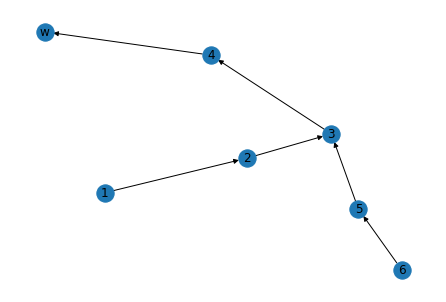

In [ ]:
B  = nx.DiGraph(directed=True)
B.add_nodes_from([1,2,3,4,5,6,'w'])

B.add_edges_from([(1,2), (2,3), (3,4), (4,'w'), (6,5), (5,3)])
nx.draw(B, with_labels=True)
#nx.draw_networkx_labels(A, pos={1:(1,2), 2:(2,3), 3:(3,4), 4:(4,7), 5:(6,5), 6:(5,3)},labels={1:'1', 2:'2', 3:'3',4:'4',5:'5',6:'6',7:'w'})


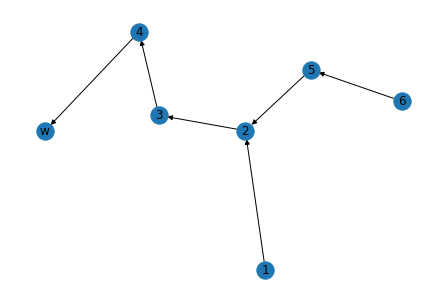

In [ ]:

A  = nx.DiGraph(directed=True)
A.add_nodes_from([1,2,3,4,5,6,'w'])

A.add_edges_from([(1,2), (2,3), (3,4), (4,'w'), (6,5), (5,2)])


nx.draw(A, with_labels=True)




plt.show()
#nx.draw_networkx_labels(A, pos={1:(1,2), 2:(2,3), 3:(3,4), 4:(4,7), 5:(6,5), 6:(5,3)},labels={1:'1', 2:'2', 3:'3',4:'4',5:'5',6:'6',7:'w'})

In [ ]:
nx.draw(A, with_labels=True)

NameError: ignored

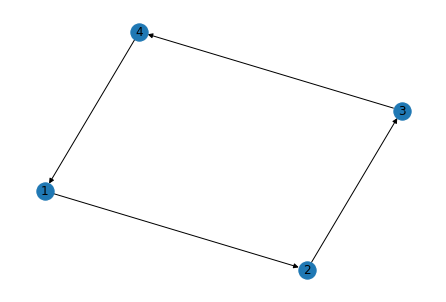

In [ ]:
A  = nx.DiGraph(directed=True)
A.add_nodes_from([1,2,3,4])

A.add_edges_from([(1,2), (2,3), (3,4), (4,1)])


nx.draw(A, with_labels=True)




plt.show()

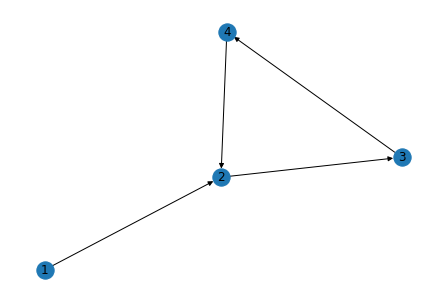

In [ ]:
A  = nx.DiGraph(directed=True)
A.add_nodes_from([1,2,3,4])

A.add_edges_from([(1,2), (2,3), (3,4), (4,2)])


nx.draw(A, with_labels=True)




plt.show()

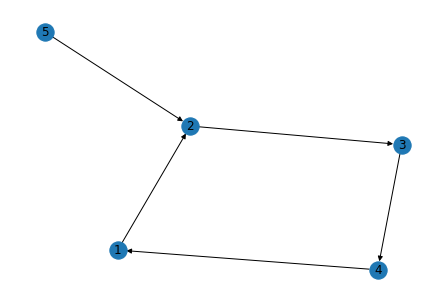

In [ ]:
A  = nx.DiGraph(directed=True)
A.add_nodes_from([1,2,3,4,5])

A.add_edges_from([(1,2), (2,3), (3,4), (4,1),(5,2)])


nx.draw(A, with_labels=True)




plt.show()

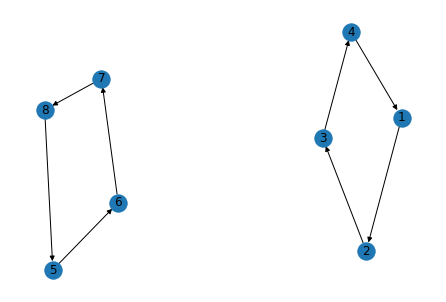

In [ ]:
A  = nx.DiGraph(directed=True)
A.add_nodes_from([1,2,3,4,5,6,7,8])

A.add_edges_from([(1,2), (2,3), (3,4), (4,1),(5,6),(6,7),(7,8),(8,5)])


nx.draw(A, with_labels=True)




plt.show()